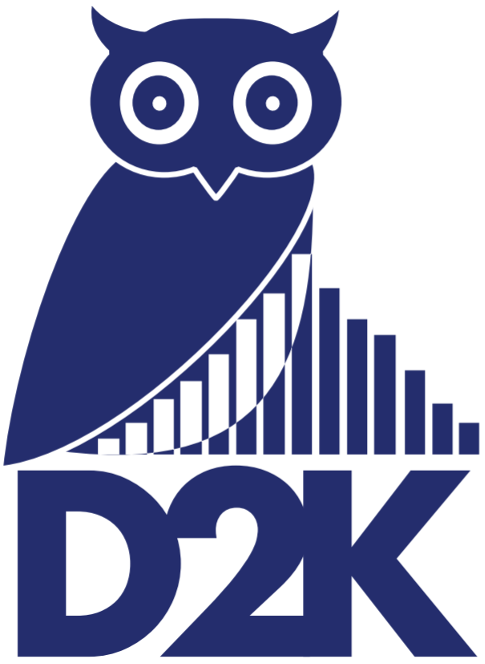 

<center>

# Welcome to DSCI 101 #
### Introduction to Data Science ###

### Code Demo for Week 12 ###

# Introduction to Machine Learning and [`Scikit-Learn`](https://scikit-learn.org/stable/)

One of the best known Python libraries for machine learning is Scikit-Learn, which provides efficient versions of a large number of common algorithms. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target array for supervised learning models:
    - in your original data, select your response varibale column as the target array.
    - select some other columns as your feature matrix. 
    - dimension: target array has length $n$, and feature matrix is $n \times p$: where $n$ is the number of row (observations) and $p$ is the number of features (variables). 
    - feature matrix and target array is the standard data representation in Scikit-Learn.
    - for unsupervised learning models, you will only have a $n \times p$ feature matrix, no target array.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.
   
In this demo we will explore K-Nearest Neighbor (KNN) for machine learning models.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['figure.figsize'] = (8,6)
import seaborn as sns

np.random.seed(2023)

## K Nearest Neighbor (KNN)

### KNN for Regression
Now let's use sklearns [`neighbors.KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on a simulated dataset. Explore how different value of K affects the predicted regression function. What value of K indicate more complex models?

In [ ]:
# generate 100 random number from 0 to 5 as my X
# sample size of training data
N_train = 100
# scale of X
X_scale = 10
# scale of noise added to f(x)
noise_scale = 0.5
# generate training data
# np.random.rand sample random numbers from [0,1]
X_train = np.sort(X_scale*np.random.rand(N_train, 1), axis=0)
# true regression function is f(x) = sin(x)
# y = sin(x) + random noise
# np.random.randn sample from standard normal 
y_train = np.sin(X_train) + noise_scale*np.random.randn(N_train, 1)
# plot the training data as scatter plot
plt.scatter(X_train, y_train, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulated data for regression');

In [ ]:
# sample size of testing data, size is large for illustration purpose
# will use model to make prediction on test data to plot the regression function
N_test = 500
# generate testing data
X_test = np.sort(X_scale*np.random.rand(N_test, 1), axis=0)

In [ ]:
# Fit KNN regression model
# import the KNN models from sklearn
from sklearn import neighbors
# change the number of K to explore
# K can be any integer between 1 to n where n is the sample size
K = ...
# define the model and pick tuning parameter K
knn_regression = ...
# fit the model with training data, 
...
# make prediction on testing data
y_test_hat = ...

In [ ]:
# plot the training data as scatter plot
plt.scatter(X_train, y_train, color='orange', label='data')
# plot testing data and model prediction as line plot
plt.plot(X_test, y_test_hat, color='navy', label='prediction')
#plt.axis('tight')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('KNNRegressor K=%i '% K);

**Practice:** 
- use the `galton.csv` data (we used in linear regression) as training data, and fit a KNN regression model with K=5 using `midparentHeight` to predict `childHeight`.
    - set up your X_train, y_train and X_test accordingly.
    - please make sure your X_train and X_test are two-dim arrays or dataframes.
    - to get X_test, use `np.arange` to create a sequence of of heights.
    - use `np.reshape` to convert X_test to a n by 1 matrix.
- use your model to make predictions on test data.
- create a similar visualization to plot the regression function.
- try different value of K and observe how the predicted function change.

In [ ]:
### your code here
...

### KNN for Classification

For classification, use sklearns [`neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [ ]:
# generate samples from 2 bivariate normal
# mean vector for the two classes
mean1 = [0, 0]
mean2 = [4, 4]
# covariate matrix for the two classes
cov1 = [[5,-2],[-2,5]]
cov2 = [[4,0],[0,4]]
# generate data for X1 and X2, the two predictors
x1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=100)
x2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=100)

# stack vertically: X is a matrix with 200 rows and 2 columns
X_train = np.vstack((x1, x2)) 
# y is class label for the 200 rows, first 100 is class 0 and second 100 is class1
y_train = np.concatenate((np.repeat(0,100), np.repeat(1,100))) 
# plot the data with color-coded labels
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simulated data for classification');

In [ ]:
# pick a K
K = ...
# define a KNN classifier
knn_class = ...
# fit the classifier on my data
...
# make prediction on training data
y_hat = ...
# how many misclassification on training set?
mis_rate = ...
mis_rate

In [ ]:
# plot the decision boundary with original data
x1_min, x1_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
x2_min, x2_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
# expand a grid on X1 and X2 that contains my training data
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
# use my knn classifier to predict every point on my grid
Z = knn_class.predict(X_grid)

# plot all points on my grid with model prediction
sns.scatterplot(x=X_grid[:,0], y=X_grid[:,1], hue=Z)
# plot original training data with class label
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, legend=False)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision boundary of KNNClassifier K=%i '% K);

### How to find the best K in KNN

In [ ]:
# generate more samples from the same 2 bivariate normal for training
train_size = 1000
x1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=train_size)
x2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=train_size)

X_train = np.vstack((x1, x2))
y_train = np.concatenate((np.repeat(0,train_size), np.repeat(1,train_size)))

In [ ]:
# generate more samples from the same 2 bivariate normal for validation
val_size = 500
x1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=val_size)
x2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=val_size)

X_val = np.vstack((x1, x2))
y_val = np.concatenate((np.repeat(0,val_size), np.repeat(1,val_size)))

In [ ]:
# fit KNN classifier with K = 1, 3, ...49
# for each K, fit on training data, predict on both training and validation data
# record training error and validation error
train_error = []
val_error = []
try_k = np.arange(1, 50, 2)

for ...:
    # define KNN classifier with particular value of K
    # fit on training data
    # make prediction on training data
    # calculate training misclassification rate for this K
    # save for this K
    
    # make prediction on validation data
    # calculate validation misclassification rate
    # save for this K

In [ ]:
# create a dataframe to show results
# 3 columns: K, training error, validation error
KNN_error =  pd.DataFrame({'K': ...,
                        'train error': ...,
                       'validation error': ...})
KNN_error

In [ ]:
KNN_error.plot(x='number of neighbors K in KNN')
plt.ylabel('misclassification rate')
plt.title('train vs. validation error');

What should be the best K according to the results?

In [ ]:
# find the minimum validation error
min_test_error = ...
# find the index corresponds to minimum validation error
best_K = ...
# print out the best K
print('Best K for the smallest validation error is: ', best_K)